# Project: Investigate a data set

## Table of content

- <a href="#intro">Introduction</a>
- <a href="#wrangling">Data Wrangling</a>
- <a href="eda">Exploratory Data Analysis</a>


<a id="intro"></a>

## Introduction

In this project we investigate
[free](https://www.gapminder.org/free-material/) data sets on
GDP per capita,
total population,
and democracy indices,
available from [www.gapminder.org](https://www.gapminder.org/)
and [World Bank Open Data](https://data.worldbank.org/)
under the [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/).

We are going to analyze data sets for the year 2018.

In [1]:
the_year = 2018

<a id="wrangling"></a>

## Data Wrangling

In [2]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### Helper functions

First we define helper functions for data wrangling.

In [3]:
def read_csv(filepath, usecols = None, col_names = None, indexcol = None, header = 0):
    """
    Convenience function to read selected columns from a CSV and assign them custom names.

    :param filepath: Path to the CSV file to be read
    :param usecols: Original columns to be used. If None then all columns will be read
    :param col_names: Custom column names to be set after reading
    :param indexcol: Column to be set as index column
    :param header: Row number to be used as header containing the original column names
    :return:
    """
    df = pd.read_csv(filepath, usecols=usecols, header=header)
    if usecols is not None:
        df.columns = col_names
    if indexcol is not None:
        df.set_index(indexcol, inplace=True)
    return df

### GDP data, in PPP dollars

We investigate the data set "GD001: GDP per capita, constant PPP dollars",
available [here](https://www.gapminder.org/data/documentation/gd001/) from Gapminder.
We consider the data on GDP per capita in [PPP (Purchasing Power Parity)](https://en.wikipedia.org/wiki/Purchasing_power_parity)
dollars for the year 2018,
compiled by [Gapminder](https://www.gapminder.org/)
from the data provided by the World Bank [here](https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.KD).

We will use pre-defined column names.

In [4]:
class ColGdp:
    country_code = "Country code"
    country = "Country"
    year = "Year"
    gdp_per_capita = "GDP per capita"
    gdp_per_capita_ppp = "GDP per capita (PPP dollars)"
    # Additional columns
    above_avg_gdp_per_capita = "Above-average GDP per capita"
    above_avg_gdp_per_capita_ppp = "Above-average GDP per capita (PPP dollars)"
    gdp_level = "GDP level"

def get_declared_class_attributes(clazz):
    return dict(filter(lambda e: not e[0].startswith("__"), clazz.__dict__.items()))

def print_declared_class_attributes(clazz):
    print(f"class {clazz.__name__}:")
    for attr_name, attr_value in get_declared_class_attributes(ColGdp).items():
        print(f'\t{attr_name} = "{attr_value}"')

print_declared_class_attributes(ColGdp)

class ColGdp:
	country_code = "Country code"
	country = "Country"
	year = "Year"
	gdp_per_capita = "GDP per capita"
	gdp_per_capita_ppp = "GDP per capita (PPP dollars)"
	above_avg_gdp_per_capita = "Above-average GDP per capita"
	above_avg_gdp_per_capita_ppp = "Above-average GDP per capita (PPP dollars)"
	gdp_level = "GDP level"


In [5]:
df_gdp_ppp = read_csv('../resources/project/GM-GDP-per-capita_Dataset-v26_data-for-contries-by-year.csv',
    header=0,
    usecols=["geo","name","time","Income per person"],
    col_names=[ColGdp.country_code, ColGdp.country, ColGdp.year, ColGdp.gdp_per_capita_ppp],
    indexcol=ColGdp.country_code)
df_gdp_ppp = df_gdp_ppp[df_gdp_ppp[ColGdp.year] == the_year]
df_gdp_ppp.head()

,Country,Year,GDP per capita (PPP dollars)
Country code,,,
afg,Afghanistan,2018,1735
alb,Albania,2018,12306
dza,Algeria,2018,13886
and,Andorra,2018,51494
ago,Angola,2018,5725


Which countries are there in the dataset?

In [6]:
print(f"There are {df_gdp_ppp[ColGdp.country].nunique()} countries in the data set:\n"
      f"{df_gdp_ppp[ColGdp.country].unique()}")

There are 195 countries in the data set:
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana'
 'Haiti' 'Honduras' 'Hong Kong, China' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'J

In [7]:
df_gdp_ppp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, afg to zwe
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Country                       195 non-null    object
 1   Year                          195 non-null    int64 
 2   GDP per capita (PPP dollars)  195 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.1+ KB


There are 195 rows and no missing values in the data set.

In [8]:
df_gdp_ppp.duplicated().sum()

0

There are no duplicated rows in the data set.

In [9]:
df_gdp_ppp[ColGdp.country].duplicated().sum()

0

There are also no duplicate country values:
each country has exactly one entry for the considered year 2018.

### GDP data, in current USD

We investigate the data set "GDP per capita (current US$)",
available [here](https://data.worldbank.org/indicator/NY.GDP.PCAP.CD) from the World Bank.
We consider the data on GDP per capita in current US dollars for the year 2018.

In [10]:
df_gdp_curr = read_csv('../resources/project/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_2055804_WorldBank_GDP_per_capita_current_USD.csv',
    header=2,
    usecols=["Country Name", "Country Code", "2018"],
    col_names=[ColGdp.country, ColGdp.country_code, ColGdp.gdp_per_capita],
    indexcol=ColGdp.country_code) # the actual header row in the dataset is preceded by some other information
df_gdp_curr.head()

,Country,GDP per capita
Country code,,
ABW,Aruba,NaN
AFG,Afghanistan,493.750418
AGO,Angola,3289.646664
ALB,Albania,5284.380184
AND,Andorra,41793.055258


Convert the country codes to lower case so that it matches the country codes in `df_gdp_ppp`.

In [11]:
df_gdp_curr.index = df_gdp_curr.index.str.lower()
df_gdp_curr.head()

,Country,GDP per capita
Country code,,
abw,Aruba,NaN
afg,Afghanistan,493.750418
ago,Angola,3289.646664
alb,Albania,5284.380184
and,Andorra,41793.055258


In [12]:
df_gdp_curr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264 entries, abw to zwe
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         264 non-null    object 
 1   GDP per capita  249 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.2+ KB


There are some missing values. We will deal with them after joining the two GDP data frames in the next subsection.

### Join the GDP data frames

We join the `df_dgp_curr` data frame containing GDP per capita in actual USD,
and the `df_gdp_ppp` data frame containing GDP in PPP dollars.

In [13]:
df_gdp = df_gdp_ppp.join(df_gdp_curr[[ColGdp.gdp_per_capita]])
df_gdp.head()

,Country,Year,GDP per capita (PPP dollars),GDP per capita
Country code,,,,
afg,Afghanistan,2018,1735,493.750418
alb,Albania,2018,12306,5284.380184
dza,Algeria,2018,13886,4153.733978
and,Andorra,2018,51494,41793.055258
ago,Angola,2018,5725,3289.646664


In [14]:
df_gdp.describe()

,Year,GDP per capita (PPP dollars),GDP per capita
count,195.0,195.000000,188.000000
mean,2018.0,18786.097436,15558.870464
std,0.0,19779.346476,23448.392538
min,2018.0,629.000000,271.752044
25%,2018.0,3779.500000,2158.678618
50%,2018.0,12143.000000,6117.407428
75%,2018.0,28209.500000,17394.775949
max,2018.0,112532.000000,185829.017960


There are a few countries where the GDP per capita is missing.

In [15]:
df_gdp[df_gdp[ColGdp.gdp_per_capita].isnull()]

,Country,Year,GDP per capita (PPP dollars),GDP per capita
Country code,,,,
eri,Eritrea,2018,1374,NaN
prk,North Korea,2018,1716,NaN
som,Somalia,2018,629,NaN
ssd,South Sudan,2018,1772,NaN
syr,Syria,2018,2900,NaN
twn,Taiwan,2018,43273,NaN
ven,Venezuela,2018,12468,NaN


We will substitute the missing values by the available values in PPP dollars:
although this is not very accurate, it should be sufficient for the envisioned analysis.

In [16]:
df_gdp[ColGdp.gdp_per_capita].fillna(df_gdp[ColGdp.gdp_per_capita_ppp], inplace=True)
df_gdp.isnull().sum()

Country                         0
Year                            0
GDP per capita (PPP dollars)    0
GDP per capita                  0
dtype: int64

We separately adjust the data point for [Venezuela](https://en.wikipedia.org/wiki/Venezuela),
a country with large [oil and natural gas reserves](https://en.wikipedia.org/wiki/Venezuela#Petroleum_and_other_resources)
that experienced a significant decline in both
[GDP](https://countryeconomy.com/gdp/venezuela#:~:text=The%20GDP%20per%20capita%20of,2017%2C%20when%20it%20was%20%244%2C894.)
and [democracy index](https://en.wikipedia.org/wiki/Democracy_Index#By_country)
since 2015.
The GDP per capita fell from ca. 10,000 USD in 2015 to less than 4,000 USD in 2018.
We will approximate the missing GDP value with the latter number.

In [17]:
df_gdp.at['ven', ColGdp.gdp_per_capita] = 4000
df_gdp[ColGdp.gdp_per_capita]['ven']

4000.0

In [18]:
df_gdp.isnull().sum()

Country                         0
Year                            0
GDP per capita (PPP dollars)    0
GDP per capita                  0
dtype: int64

Now there are no more missing values.

### The total population data set

We investigate the data set "Total population",
available [here](https://data.worldbank.org/indicator/SP.POP.TOTL) from the World Bank.
We consider the data on total population for the year 2018.

In [19]:
class ColPop:
    country_code = "Country code"
    country = "Country"
    population = "Population"

In [20]:
df_pop = read_csv('../resources/project/API_SP.POP.TOTL_DS2_en_csv_v2_2163507_WorldBank_total_population.csv',
    header=2,
    usecols=["Country Name", "Country Code", f"{the_year}"],
    col_names=[ColPop.country, ColPop.country_code, ColPop.population],
    indexcol=ColPop.country_code)
df_pop.head()

,Country,Population
Country code,,
ABW,Aruba,105845.0
AFG,Afghanistan,37172386.0
AGO,Angola,30809762.0
ALB,Albania,2866376.0
AND,Andorra,77006.0


Convert the country codes to lower case so that it matches the country codes in the other data frames.

In [21]:
df_pop.index = df_pop.index.str.lower()
df_pop.head()

,Country,Population
Country code,,
abw,Aruba,105845.0
afg,Afghanistan,37172386.0
ago,Angola,30809762.0
alb,Albania,2866376.0
and,Andorra,77006.0


In [22]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264 entries, abw to zwe
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     264 non-null    object 
 1   Population  262 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.2+ KB


In [23]:
df_pop[df_pop[ColPop.population].isnull()]

,Country,Population
Country code,,
eri,Eritrea,NaN
inx,Not classified,NaN


There are two rows with missing population figures. We will omit these rows for our analysis.

In [24]:
df_pop.dropna(inplace=True)

In [25]:
df_pop.sort_values(by=ColPop.population, ascending=False)

,Country,Population
Country code,,
wld,World,7.591945e+09
ibt,IDA & IBRD total,6.410739e+09
lmy,Low & middle income,6.361430e+09
mic,Middle income,5.710102e+09
ibd,IBRD only,4.777257e+09
...,...,...
gib,Gibraltar,3.371800e+04
vgb,British Virgin Islands,2.980200e+04
plw,Palau,1.790700e+04


It turns out that the data set contains more values, than just the population by country.
For example, it has a row for the total world population and also rows for population by region and income.
This data would only disturb our analysis, so we filter the data set to contain only countries
that are also present in the other data sets.

In [26]:
df_pop = df_pop.filter(df_gdp.index, axis='index')
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, afg to zwe
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     193 non-null    object 
 1   Population  193 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.5+ KB


The `population` column should contain integers, but was imported as `float64`,
probably because of the rows with missing values.
We will convert the column to `int64`.

In [27]:
df_pop[ColPop.population] = df_pop[ColPop.population].astype('int64')
df_pop.head()

,Country,Population
Country code,,
afg,Afghanistan,37172386
alb,Albania,2866376
dza,Algeria,42228429
and,Andorra,77006
ago,Angola,30809762


In [28]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, afg to zwe
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     193 non-null    object
 1   Population  193 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.5+ KB


Now the population data set has been cleaned for our intended analysis.

### The fuel exports data set

We investigate the data set "Fuel exports (% of merchandise exports)",
available [here](https://data.worldbank.org/indicator/TX.VAL.FUEL.ZS.UN) from the World Bank.
We consider the data on fuel exports for the year 2018.

In [29]:
class ColFuel:
    country_code = "Country code"
    country = "Country"
    fuel_exports = "Fuel exports (% of merchandise exports)"

We expect some missing values for 2018,
so we also import the data for 2 previous years in order to fill in the gaps.

In [30]:
fuel_exports_2_years_ago = "Fuel exports 2 years ago"
fuel_exports_1_year_ago = "Fuel exports 1 year ago"
df_fuel = read_csv('../resources/project/API_TX.VAL.FUEL.ZS.UN_DS2_en_csv_v2_2167156_WorldBank_fuel_exports.csv',
    header=2,
    usecols=["Country Name", "Country Code", f"{the_year - 2}", f"{the_year - 1}", f"{the_year}"],
    col_names=[ColFuel.country, ColFuel.country_code, fuel_exports_2_years_ago, fuel_exports_1_year_ago, ColFuel.fuel_exports],
    indexcol=ColFuel.country_code)
df_fuel.head()

,Country,Fuel exports 2 years ago,Fuel exports 1 year ago,Fuel exports (% of merchandise exports)
Country code,,,,
ABW,Aruba,0.104982,0.114804,0.059140
AFG,Afghanistan,NaN,NaN,10.213180
AGO,Angola,92.701056,94.691252,92.417810
ALB,Albania,11.175063,0.824033,1.662666
AND,Andorra,0.010607,0.008582,0.013639


Convert the country codes to lower case so that it matches the country codes in the other data frames.

In [31]:
df_fuel.index = df_fuel.index.str.lower()
df_fuel.head()

,Country,Fuel exports 2 years ago,Fuel exports 1 year ago,Fuel exports (% of merchandise exports)
Country code,,,,
abw,Aruba,0.104982,0.114804,0.059140
afg,Afghanistan,NaN,NaN,10.213180
ago,Angola,92.701056,94.691252,92.417810
alb,Albania,11.175063,0.824033,1.662666
and,Andorra,0.010607,0.008582,0.013639


In [32]:
df_fuel[df_fuel[ColFuel.fuel_exports].isnull()]

,Country,Fuel exports 2 years ago,Fuel exports 1 year ago,Fuel exports (% of merchandise exports)
Country code,,,,
asm,American Samoa,NaN,NaN,NaN
bgd,Bangladesh,NaN,NaN,NaN
btn,Bhutan,NaN,NaN,NaN
chi,Channel Islands,NaN,NaN,NaN
cmr,Cameroon,7.692626,43.449411,NaN
...,...,...,...,...
vgb,British Virgin Islands,NaN,NaN,NaN
vir,Virgin Islands (U.S.),NaN,NaN,NaN
vut,Vanuatu,NaN,NaN,NaN


There are a lot of missing values.
We fill try to fill them from the previous years.

In [33]:
df_fuel.loc[:, fuel_exports_2_years_ago:] = df_fuel.loc[:, fuel_exports_2_years_ago:].fillna(method='ffill', axis='columns')
df_fuel[ColFuel.fuel_exports].isnull().sum()

62

There are still a lot of missing values: we now assume that those are no longer relevant for our analysis
and fill them with 0.

In [34]:
df_fuel.fillna(0, inplace=True)

We drop the columns for previous years because we only needed them to fill missing values.

In [35]:
df_fuel.drop(columns=[fuel_exports_2_years_ago, fuel_exports_1_year_ago], inplace=True)
df_fuel.head()

,Country,Fuel exports (% of merchandise exports)
Country code,,
abw,Aruba,0.059140
afg,Afghanistan,10.213180
ago,Angola,92.417810
alb,Albania,1.662666
and,Andorra,0.013639


In [36]:
df_fuel.describe()

,Fuel exports (% of merchandise exports)
count,264.000000
mean,14.150729
std,23.942621
min,0.000000
25%,0.000008
50%,2.114630
75%,15.619748
max,99.986485


In [37]:
df_fuel.loc[['wld', 'mea', 'oed']]

,Country,Fuel exports (% of merchandise exports)
Country code,,
wld,World,14.251782
mea,Middle East & North Africa,67.595873
oed,OECD members,8.382116


This data set, similarly to the population data set, contains more values, than just the fuel exports by country.
For example, it has a row for the world and for some world regions.
This data would only disturb our analysis, so we filter the data set to contain only countries
that are also present in the other data sets.

In [38]:
df_fuel = df_fuel.filter(df_gdp.index, axis='index')
df_fuel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, afg to zwe
Data columns (total 2 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  194 non-null    object 
 1   Fuel exports (% of merchandise exports)  194 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.5+ KB


Now the fuel export data set has been cleaned for our intended analysis.

### The democracy index data set

We investigate the data set "Democracy indices" published by the
[The Economist Intelligence Unit](https://www.eiu.com/),
available [here](https://data.worldbank.org/indicator/NY.GDP.PCAP.CD) from the World Bank.

We consider the overall democracy index scores for the year 2018,
calculated from five category indices measuring
electoral process and pluralism, functioning of government, political participation, political culture, and civil liberties.
Further freely available explanation on the democracy index can be found in the [Wikipedia article](https://en.wikipedia.org/wiki/Democracy_Index).

In [39]:
class ColDem:
    """Column names for the democracy index data set"""
    country_code = "Country code"
    country = "Country"
    year = "Year"
    democracy_index = "Democracy index"
    # Additional columns
    regime_type = "Regime type"

In [40]:
df_dem = read_csv('../resources/project/EIU-Democracy-Indices_Dataset-v3_data-for-countries-by-year.csv',
    usecols=["geo", "name", "time", "Democracy index (EIU)"],
    col_names=[ColDem.country_code, ColDem.country, ColDem.year, ColDem.democracy_index],
    indexcol=ColDem.country_code)
df_dem = df_dem[df_dem[ColDem.year] == the_year].copy()
df_dem.head()

,Country,Year,Democracy index
Country code,,,
afg,Afghanistan,2018,29.7
alb,Albania,2018,59.8
dza,Algeria,2018,35.0
ago,Angola,2018,36.2
arg,Argentina,2018,70.2


In [41]:
df_dem.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, afg to zwe
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          167 non-null    object 
 1   Year             167 non-null    int64  
 2   Democracy index  167 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.2+ KB


There are 167 rows and no missing values in the data set.

Calculate the regime type. The EUI differentiates between
full democracy, flawed democracy, hybrid regime, and authoritarian regime,
cf. [EUI's democracy index visualization](https://infographics.economist.com/2018/DemocracyIndex/)
or the [Wikipedia article on Democracy Index](https://en.wikipedia.org/wiki/Democracy_Index#By_regime_type).
We simplify this differentiation to the 3 categories Democracy, Hybrid, and Authoritarian:

| Type of Regime | Democracy Index |
|:---------------|:----------------|
| Democracy | 6 - 10 |
| Hybrid | 4 - 6 |
| Authoritarian | 0 - 4 |

In [42]:
class RegimeType:
    democracy = "Democracy"
    hybrid = "Hybrid"
    authoritarian = "Authoritarian"

regime_types = [RegimeType.authoritarian, RegimeType.hybrid, RegimeType.democracy]
regime_type_edges = [0, 40, 60, 100]
df_dem[ColDem.regime_type] = pd.cut(df_dem[ColDem.democracy_index], bins=regime_type_edges, labels=regime_types)
df_dem.head()

,Country,Year,Democracy index,Regime type
Country code,,,,
afg,Afghanistan,2018,29.7,Authoritarian
alb,Albania,2018,59.8,Hybrid
dza,Algeria,2018,35.0,Authoritarian
ago,Angola,2018,36.2,Authoritarian
arg,Argentina,2018,70.2,Democracy


#### Assess missing data in democracy data frame

In [43]:
print(f"Number of countries in GDP data frame: {len(df_gdp)}")
print(f"Number of countries in Democracy data frame: {len(df_dem)}")
print(f"There are {df_gdp.index.difference(df_dem.index).size} countries with GDP data but no democracy index data")

Number of countries in GDP data frame: 195
Number of countries in Democracy data frame: 167
There are 28 countries with GDP data but no democracy index data


There are almost 30 countries where democracy index data is missing.
We want to check how much of GDP and population they represent to assess
if we can omit them from our analysis.

In [44]:
df_dem_missing = df_gdp.loc[df_gdp.index.difference(df_dem.index)]\
    .join(df_pop[ColPop.population])
df_dem_missing

,Country,Year,GDP per capita (PPP dollars),GDP per capita,Population
Country code,,,,,
and,Andorra,2018,51494,41793.055258,77006
atg,Antigua and Barbuda,2018,23768,16672.744240,96286
bhs,Bahamas,2018,28833,33767.503371,385640
blz,Belize,2018,7810,4884.734162,383071
brb,Barbados,2018,16698,17745.193465,286641
brn,Brunei,2018,71802,31628.328791,428962
dma,Dominica,2018,9467,7693.878870,71625
fsm,"Micronesia, Fed. Sts.",2018,3196,3568.291016,112640
grd,Grenada,2018,13970,10485.907157,111454


It looks like almost all of those countries are quite small, most of them having a population of less than 1M,
and some even less than 100.000.

We now calculate the share of their population and GDP relatively to all countries in the GDP data set.

In [45]:
pop_total = df_pop[ColPop.population].sum()
pop_total_missing_in_df_dem = df_dem_missing[ColPop.population].sum()

gdp_total = (df_gdp[ColGdp.gdp_per_capita] * df_gdp.join(df_pop[ColPop.population])[ColPop.population]).sum()
gdp_total_missing_in_df_dem = (df_dem_missing[ColGdp.gdp_per_capita] * df_dem_missing[ColPop.population]).sum()

The following data frame shows the population, the GDP, and the percentage of population and GDP
in countries with missing democracy data in relation to all countries in the GDP data set:

In [46]:
pd.DataFrame(
    data=[[pop_total, gdp_total],
          [pop_total_missing_in_df_dem, gdp_total_missing_in_df_dem],
          [f"{pop_total_missing_in_df_dem / pop_total * 100:.2f}%", f"{gdp_total_missing_in_df_dem / gdp_total * 100:.2f}%"]],
    index=["All countries", "Countries without democracy index data", "Percentage for countries without democracy index data "],
    columns=["Total Population", "Total GDP"])

,Total Population,Total GDP
All countries,7557379456,8.51583e+13
Countries without democracy index data,30639133,9.4096e+10
Percentage for countries without democracy index data,0.41%,0.11%


The countries with missing democracy data represent
around 0.4% of world population
and around 0.1% of world GDP.
Hence, leaving them out would not significantly impact the outcome of our analysis.

### Join all data sets

Join the GDP per capita in the `df_gdp` data frame
with the `df_pop` data frame containing population values,
the `df_fuel` data frame containing fuel export values,
and the `df_dem` data frame containing democracy index values.

We will use inner join to consider only data on countries,
for which every data frame has values available.

In [47]:
df = df_gdp.join(df_pop[ColPop.population], how="inner")\
    .join(df_dem[[ColDem.democracy_index, ColDem.regime_type]], how="inner")\
    .join(df_fuel[ColFuel.fuel_exports], how="inner")
df.head()

,Country,Year,GDP per capita (PPP dollars),GDP per capita,Population,Democracy index,Regime type,Fuel exports (% of merchandise exports)
Country code,,,,,,,,
afg,Afghanistan,2018,1735,493.750418,37172386,29.7,Authoritarian,10.213180
alb,Albania,2018,12306,5284.380184,2866376,59.8,Hybrid,1.662666
dza,Algeria,2018,13886,4153.733978,42228429,35.0,Authoritarian,96.111562
ago,Angola,2018,5725,3289.646664,30809762,36.2,Authoritarian,92.417810
arg,Argentina,2018,18282,11633.498009,44494502,70.2,Democracy,4.119375


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165 entries, afg to zwe
Data columns (total 8 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   Country                                  165 non-null    object  
 1   Year                                     165 non-null    int64   
 2   GDP per capita (PPP dollars)             165 non-null    int64   
 3   GDP per capita                           165 non-null    float64 
 4   Population                               165 non-null    int64   
 5   Democracy index                          165 non-null    float64 
 6   Regime type                              165 non-null    category
 7   Fuel exports (% of merchandise exports)  165 non-null    float64 
dtypes: category(1), float64(3), int64(3), object(1)
memory usage: 10.6+ KB


We now have a data frame of 165 countries
containing data on
GDP per capita (in PPP dollars and in current USD),
population,
democracy level,
and fuel exports
for the year 2018.

<a id="eda"></a>

## Exploratory Data Analysis

We will explore, how the wealth of a country, measured by its GDP per capita,
correlates with its form of government, measured by democracy index.
We will also take into account, whether fuel exports are an important economic factor for the country,
which could notably contribute to its wealth.

#### Helper functions

We define helper functions for data analysis.

In [49]:
def sort_and_rank(df, by:str, ascending = False, rank_col_name = "Rank", rank_start = 1):
    """
    Returns a data frame obtained by sorting the given data frame by the given column.
    It will also have a new column containing the rank of each row in the obtained sorting order.

    :param df: data frame to be sorted
    :param by: column to be sorted by
    :param ascending: sorting order (ascending if True, otherwise descending)
    :param rank_col_name: name of new column containing the rank of each row in the obtained sorting order
    :param rank_start: rank value for the first row (default 1).
    :return: new sorted data frame
    """
    df_res = df.sort_values(by=by, ascending=ascending)
    df_res[rank_col_name] = range(rank_start, rank_start + len(df_res))
    return df_res

In [50]:
def corrcoef(x, y):
    """
    Convenience method to calculate the Pearson correlation coefficient.

    See also: numpy.corrcoef (https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html)
    """
    corr_matrix = np.corrcoef([x.values, y.values])
    return corr_matrix[1, 0]

In [51]:
def annotate_bars(ax, idx_value_pairs, value_format = ""):
    """
    Annotates the bars of a bar plot with corresponding values.

    Usage example for a Series with float values:
        ``ax = some_series.plot(kind='bar')``

        ``annotate_bars(ax, enumerate(some_series), ".2f")``

    :param ax: bar plot, e.g. an AxesSubplot
    :param idx_value_pairs: an iterable containing the pairs (index, value)
    :param value_format: optional string format for the values
    """
    for idx, value in idx_value_pairs:
        ax.annotate(f"{value:{value_format}}",
                    xy = (idx, value), xytext=(0, 3),
                    textcoords="offset points", ha="center", va="bottom")

    plt.ylim(0, s_pop_bn_by_gdp_level.max() * 1.1) # leave some space for bar annotations

### Possible research questions: TBD

- Population and wealth of countries by regime type (democratic/hybrid/authoritarian)
-- What percentage of world population lives in which regime type
-- What percentage of total GDP is produced in which regime type

- What is the correlation between democracy index and the GDP per capita in a country?
-- Correlation between democracy index and GDP per capita
-- Correlation between fuel exports and wealth in non-democratic countries



#### Analyze what are the most democratic countries

In [52]:
sort_and_rank(df, by=ColDem.democracy_index).head(30)

,Country,Year,GDP per capita (PPP dollars),GDP per capita,Population,Democracy index,Regime type,Fuel exports (% of merchandise exports),Rank
Country code,,,,,,,,,
nor,Norway,2018,65441,81734.465574,5311916,98.7,Democracy,62.123119,1
isl,Iceland,2018,48606,72968.704228,352721,95.8,Democracy,2.013826,2
swe,Sweden,2018,47194,54589.060386,10175214,93.9,Democracy,7.433939,3
nzl,New Zealand,2018,36355,42949.930585,4841000,92.6,Democracy,1.813976,4
dnk,Denmark,2018,47673,61598.536704,5793636,92.2,Democracy,4.312456,5
irl,Ireland,2018,70361,78621.227931,4867316,91.5,Democracy,0.852938,6
can,Canada,2018,44051,46313.171371,37057765,91.5,Democracy,24.005792,7
fin,Finland,2018,41899,50030.877311,5515525,91.4,Democracy,8.479419,8
aus,Australia,2018,45439,57354.964046,24982688,90.9,Democracy,23.069720,9


#### Analyze what are the wealthiest countries

Filter and plot the top 30 wealthiest countries w.r.t. GDP per capita in PPP dollars

In [53]:
df_sorted_by_gdp_per_capita = sort_and_rank(df, by=ColGdp.gdp_per_capita)
df_sorted_by_gdp_per_capita.head()

,Country,Year,GDP per capita (PPP dollars),GDP per capita,Population,Democracy index,Regime type,Fuel exports (% of merchandise exports),Rank
Country code,,,,,,,,,
lux,Luxembourg,2018,93734,116654.261067,607950,88.1,Democracy,0.098012,1
che,Switzerland,2018,59019,82818.108162,8514329,90.3,Democracy,0.936366,2
nor,Norway,2018,65441,81734.465574,5311916,98.7,Democracy,62.123119,3
irl,Ireland,2018,70361,78621.227931,4867316,91.5,Democracy,0.852938,4
isl,Iceland,2018,48606,72968.704228,352721,95.8,Democracy,2.013826,5


Plot the wealthiest countries w.r.t. GDP per capita.

In [54]:
from matplotlib.lines import Line2D

def plot_bars_colored_by_regime_type(
        df, col_name, title, xlabel, ylabel,
        title_font_size = 16, label_font_size = 14):

    legend_elements = [
        Line2D([0], [0], color='g', lw=6),
        Line2D([0], [0], color='y', lw=6),
        Line2D([0], [0], color='r', lw=6)]
    legend_labels = [
        f"{col_name}, {RegimeType.democracy}",
        f"{col_name}, {RegimeType.hybrid}",
        f"{col_name}, {RegimeType.authoritarian}"]

    regime_type_to_color = lambda type: 'g' if type == RegimeType.democracy \
        else 'y' if type == RegimeType.hybrid \
        else 'r'
    bar_colors = df[ColDem.regime_type].map(regime_type_to_color)

    y_max = df[col_name].max()

    df.plot(kind='bar', x=ColGdp.country, y=col_name, color=bar_colors, figsize=(10, 5))

    plt.ylim(0, y_max * 1.4) # leave enough space for the legend
    plt.legend(legend_elements, legend_labels)
    plt.title(title, fontsize=title_font_size)
    plt.xlabel(xlabel, fontsize=label_font_size)
    plt.ylabel(ylabel, fontsize=label_font_size);

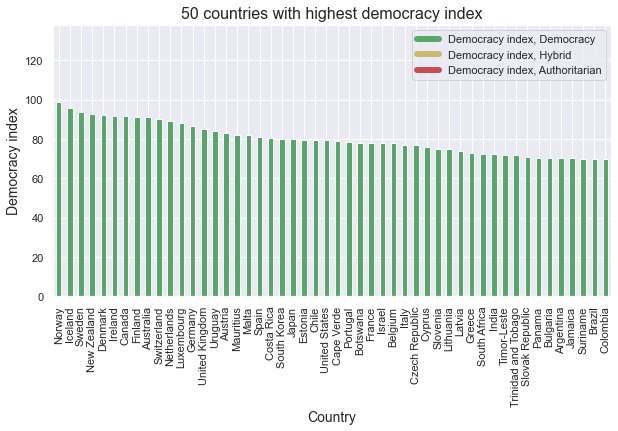

In [55]:
num_countries = 50
plot_bars_colored_by_regime_type(
    df.sort_values(by=ColDem.democracy_index, ascending=False).head(num_countries),
    col_name=ColDem.democracy_index,
    title=f"{num_countries} countries with highest democracy index",
    xlabel='Country',
    ylabel='Democracy index')

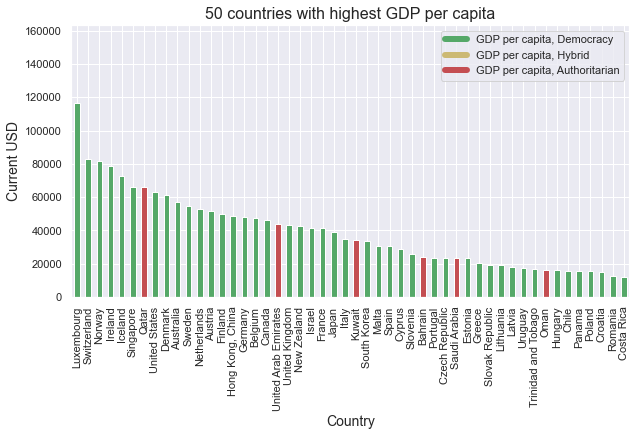

In [56]:
num_countries = 50
plot_bars_colored_by_regime_type(
    df.sort_values(by=ColGdp.gdp_per_capita, ascending=False).head(num_countries),
    col_name=ColGdp.gdp_per_capita,
    title=f"{num_countries} countries with highest GDP per capita",
    xlabel='Country',
    ylabel='Current USD')

We see that almost all of the 50 wealthiest countries are democracies.
The remaining wealthy countries, like Qatar, UAE, were assessed as authoritarian,
and seem to be heavy on oil exports.
That's why we now look at the fuel export percentages for the same 50 countries.

Population distribution by regime type

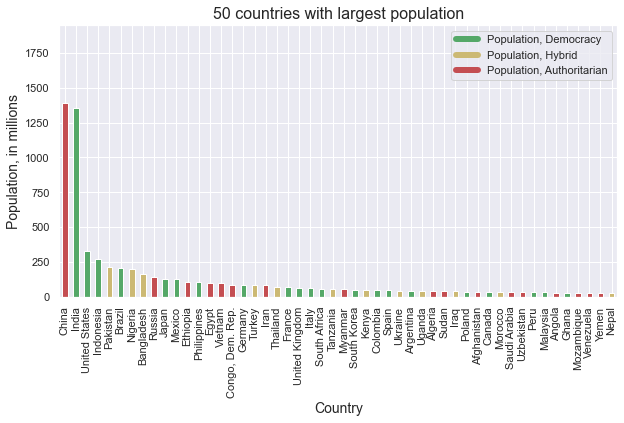

In [57]:
df_pop_millions = df.sort_values(by=ColPop.population, ascending=False)
df_pop_millions[ColPop.population] = df_pop_millions[ColPop.population] / 1e6
num_countries = 50
plot_bars_colored_by_regime_type(
    df_pop_millions.head(num_countries),
    col_name=ColPop.population,
    title=f"{num_countries} countries with largest population",
    xlabel='Country',
    ylabel='Population, in millions')

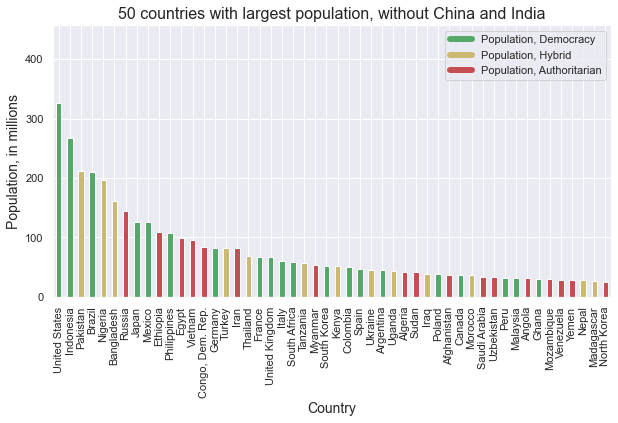

In [58]:
num_countries = 50
plot_bars_colored_by_regime_type(
    df_pop_millions.iloc[2:].head(num_countries),
    col_name=ColPop.population,
    title=f"{num_countries} countries with largest population, without China and India",
    xlabel='Country',
    ylabel='Population, in millions')

In [59]:
corrcoef(df[ColPop.population], df[ColDem.democracy_index])

-0.012320091733066573

It turns out that there is no correlation between population and democracy index,
the calculated correlation coefficient is almost 0 (or more exactly, -0.012).

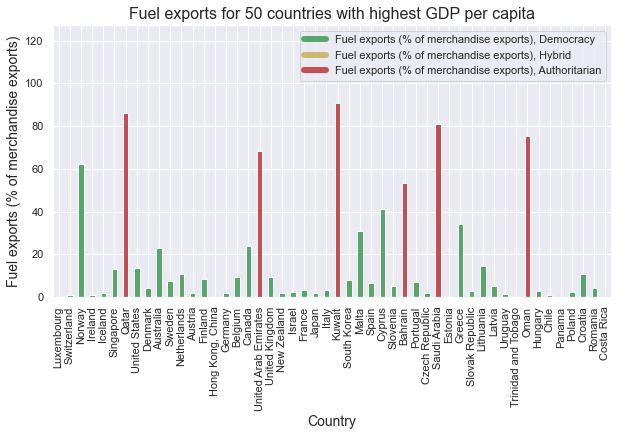

In [60]:
num_countries = 50
plot_bars_colored_by_regime_type(
    df.sort_values(by=ColGdp.gdp_per_capita, ascending=False).head(num_countries),
    col_name=ColFuel.fuel_exports,
    title=f"Fuel exports for {num_countries} countries with highest GDP per capita",
    xlabel='Country',
    ylabel=ColFuel.fuel_exports)

The chart shows that of the 50 wealthiest countries
- many democratic countries have fuel exports, most of them below 20%, some of them up to 40% of total merchandise exports
- Norway, one of the richest and most democratic countries in the world, has over 60% of fuel exports
- _all_ non-democratic countries have fuel exports of more than 50%, some of them over 80% of total merchandise exports

In [61]:
def bar_chart_sorted(data, title = "", color = None):
    data.sort_values(ascending=False).plot(kind='bar', title=title, color = color);

def pie_chart_sorted(data, title = "", colors = None):
    data.sort_values(ascending=False).plot(kind='pie', title=title, colors = colors, autopct='%1.1f%%');

In [62]:
pop_by_regime_type = df.groupby(ColDem.regime_type)[ColPop.population].sum()
pop_percentage_by_regime_type = pop_by_regime_type / pop_by_regime_type.sum() * 100
pop_percentage_by_regime_type

Regime type
Authoritarian    35.675642
Hybrid           16.782591
Democracy        47.541768
Name: Population, dtype: float64

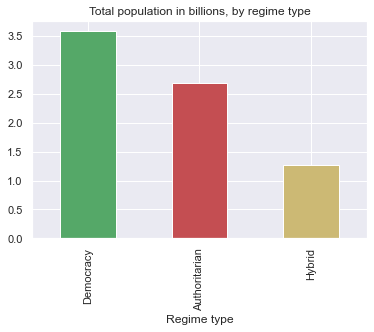

In [63]:
bar_chart_sorted(pop_by_regime_type / 1e9,
                 title="Total population in billions, by regime type",
                 color=['g', 'r', 'y'])

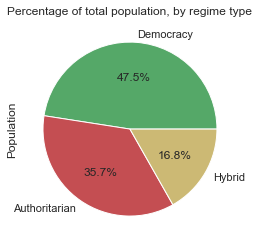

In [64]:
pie_chart_sorted(pop_percentage_by_regime_type,
                 title="Percentage of total population, by regime type",
                 colors=['g', 'r', 'y'])

#### Analyze which countries have above/below-average GDP

The world average GDP per capita in 2018 was 15941 (constant PPP dollars)
according to the data set `GM-GDP-per-capita_Dataset-v26_data-for-world-by-year.csv`,
linked [here](https://www.gapminder.org/data/documentation/gd001/).

In [65]:
world_avg_gdp_per_capita_ppp = 15941

Here are the countries having an above-averate GDP per capita in PPP dollars.

In [66]:
df[df[ColGdp.gdp_per_capita_ppp] >= world_avg_gdp_per_capita_ppp]\
    .sort_values(by=ColGdp.gdp_per_capita_ppp, ascending=False)

,Country,Year,GDP per capita (PPP dollars),GDP per capita,Population,Democracy index,Regime type,Fuel exports (% of merchandise exports)
Country code,,,,,,,,
qat,Qatar,2018,112532,65908.066901,2781677,31.9,Authoritarian,86.129643
lux,Luxembourg,2018,93734,116654.261067,607950,88.1,Democracy,0.098012
sgp,Singapore,2018,90091,66188.779396,5638676,63.8,Democracy,13.120045
irl,Ireland,2018,70361,78621.227931,4867316,91.5,Democracy,0.852938
are,United Arab Emirates,2018,66616,43839.356349,9630959,27.6,Authoritarian,68.554755
...,...,...,...,...,...,...,...,...
tha,Thailand,2018,16905,7295.475616,69428524,46.3,Hybrid,4.225474
bwa,Botswana,2018,16518,8279.601739,2254126,78.1,Democracy,0.183627
chn,China,2018,16187,9976.677137,1392730000,33.2,Authoritarian,1.869449


In [67]:
df[ColGdp.above_avg_gdp_per_capita_ppp] = df[ColGdp.gdp_per_capita_ppp] >= world_avg_gdp_per_capita_ppp
df.head()

,Country,Year,GDP per capita (PPP dollars),GDP per capita,Population,Democracy index,Regime type,Fuel exports (% of merchandise exports),Above-average GDP per capita (PPP dollars)
Country code,,,,,,,,,
afg,Afghanistan,2018,1735,493.750418,37172386,29.7,Authoritarian,10.213180,False
alb,Albania,2018,12306,5284.380184,2866376,59.8,Hybrid,1.662666,False
dza,Algeria,2018,13886,4153.733978,42228429,35.0,Authoritarian,96.111562,False
ago,Angola,2018,5725,3289.646664,30809762,36.2,Authoritarian,92.417810,False
arg,Argentina,2018,18282,11633.498009,44494502,70.2,Democracy,4.119375,True


The world average GDP per capita in 2018 was 11385
according to [GDP per capita (current US$)](https://data.worldbank.org/indicator/NY.GDP.PCAP.CD)
from [World Bank Open Data](https://data.worldbank.org/).

In [68]:
world_avg_gdp_per_capita_current_usd = 11385

Here are the countries having an above-average GDP per capita in current USD.

In [69]:
df[df[ColGdp.gdp_per_capita] >= world_avg_gdp_per_capita_current_usd]\
    .sort_values(by=ColGdp.gdp_per_capita, ascending=False)

,Country,Year,GDP per capita (PPP dollars),GDP per capita,Population,Democracy index,Regime type,Fuel exports (% of merchandise exports),Above-average GDP per capita (PPP dollars)
Country code,,,,,,,,,
lux,Luxembourg,2018,93734,116654.261067,607950,88.1,Democracy,0.098012,True
che,Switzerland,2018,59019,82818.108162,8514329,90.3,Democracy,0.936366,True
nor,Norway,2018,65441,81734.465574,5311916,98.7,Democracy,62.123119,True
irl,Ireland,2018,70361,78621.227931,4867316,91.5,Democracy,0.852938,True
isl,Iceland,2018,48606,72968.704228,352721,95.8,Democracy,2.013826,True
sgp,Singapore,2018,90091,66188.779396,5638676,63.8,Democracy,13.120045,True
qat,Qatar,2018,112532,65908.066901,2781677,31.9,Authoritarian,86.129643,True
usa,United States,2018,55681,62996.471285,326687501,79.6,Democracy,13.529994,True
dnk,Denmark,2018,47673,61598.536704,5793636,92.2,Democracy,4.312456,True


In [70]:
df[ColGdp.above_avg_gdp_per_capita] = df[ColGdp.gdp_per_capita] >= world_avg_gdp_per_capita_current_usd
df.head()

,Country,Year,GDP per capita (PPP dollars),GDP per capita,Population,Democracy index,Regime type,Fuel exports (% of merchandise exports),Above-average GDP per capita (PPP dollars),Above-average GDP per capita
Country code,,,,,,,,,,
afg,Afghanistan,2018,1735,493.750418,37172386,29.7,Authoritarian,10.213180,False,False
alb,Albania,2018,12306,5284.380184,2866376,59.8,Hybrid,1.662666,False,False
dza,Algeria,2018,13886,4153.733978,42228429,35.0,Authoritarian,96.111562,False,False
ago,Angola,2018,5725,3289.646664,30809762,36.2,Authoritarian,92.417810,False,False
arg,Argentina,2018,18282,11633.498009,44494502,70.2,Democracy,4.119375,True,True


Countries where both GDP per capita values are above average:

In [71]:
df[(df[ColGdp.above_avg_gdp_per_capita_ppp]) & (df[ColGdp.above_avg_gdp_per_capita])]\
    .sort_values(by=ColGdp.gdp_per_capita, ascending=False)

,Country,Year,GDP per capita (PPP dollars),GDP per capita,Population,Democracy index,Regime type,Fuel exports (% of merchandise exports),Above-average GDP per capita (PPP dollars),Above-average GDP per capita
Country code,,,,,,,,,,
lux,Luxembourg,2018,93734,116654.261067,607950,88.1,Democracy,0.098012,True,True
che,Switzerland,2018,59019,82818.108162,8514329,90.3,Democracy,0.936366,True,True
nor,Norway,2018,65441,81734.465574,5311916,98.7,Democracy,62.123119,True,True
irl,Ireland,2018,70361,78621.227931,4867316,91.5,Democracy,0.852938,True,True
isl,Iceland,2018,48606,72968.704228,352721,95.8,Democracy,2.013826,True,True
sgp,Singapore,2018,90091,66188.779396,5638676,63.8,Democracy,13.120045,True,True
qat,Qatar,2018,112532,65908.066901,2781677,31.9,Authoritarian,86.129643,True,True
usa,United States,2018,55681,62996.471285,326687501,79.6,Democracy,13.529994,True,True
dnk,Denmark,2018,47673,61598.536704,5793636,92.2,Democracy,4.312456,True,True


Countries where one of the two GDP per capita values is above average:

In [72]:
df[(~df[ColGdp.above_avg_gdp_per_capita_ppp]) ^ (~df[ColGdp.above_avg_gdp_per_capita])]\
    .sort_values(by=ColGdp.gdp_per_capita, ascending=False)

,Country,Year,GDP per capita (PPP dollars),GDP per capita,Population,Democracy index,Regime type,Fuel exports (% of merchandise exports),Above-average GDP per capita (PPP dollars),Above-average GDP per capita
Country code,,,,,,,,,,
cri,Costa Rica,2018,15685,12112.134421,4999441,80.7,Democracy,0.032671,False,True
mys,Malaysia,2018,28176,11377.455002,31528585,68.8,Democracy,15.569077,True,False
rus,Russia,2018,25367,11370.813456,144477860,29.4,Authoritarian,52.680834,True,False
mus,Mauritius,2018,21075,11208.343818,1265303,82.2,Democracy,1.100126,True,False
gnq,Equatorial Guinea,2018,20865,10144.195811,1308974,19.2,Authoritarian,0.000000,True,False
chn,China,2018,16187,9976.677137,1392730000,33.2,Authoritarian,1.869449,True,False
kaz,Kazakhstan,2018,24738,9812.601405,18276498,29.4,Authoritarian,70.032848,True,False
mex,Mexico,2018,18102,9686.513783,126190788,61.9,Democracy,6.567899,True,False
tur,Turkey,2018,25287,9455.593654,82319724,43.7,Hybrid,2.464243,True,False


Countries where both GDP per capita values are below average:

In [73]:
df[(~df[ColGdp.above_avg_gdp_per_capita_ppp]) & (~df[ColGdp.above_avg_gdp_per_capita])]\
    .sort_values(by=ColGdp.gdp_per_capita, ascending=False)

,Country,Year,GDP per capita (PPP dollars),GDP per capita,Population,Democracy index,Regime type,Fuel exports (% of merchandise exports),Above-average GDP per capita (PPP dollars),Above-average GDP per capita
Country code,,,,,,,,,,
bra,Brazil,2018,14283,9001.234249,209469333,69.7,Democracy,12.368601,False,False
cub,Cuba,2018,7889,8821.818891,11338138,30.0,Authoritarian,0.000000,False,False
dom,Dominican Republic,2018,15821,8050.630440,10627165,65.4,Democracy,0.292812,False,False
lbn,Lebanon,2018,11607,8024.803271,6848925,46.3,Hybrid,0.836216,False,False
gab,Gabon,2018,15922,7956.627816,2119275,36.1,Authoritarian,0.000000,False,False
...,...,...,...,...,...,...,...,...,...,...
moz,Mozambique,2018,1180,503.318727,29495962,38.5,Authoritarian,46.559943,False,False
afg,Afghanistan,2018,1735,493.750418,37172386,29.7,Authoritarian,10.213180,False,False
caf,Central African Republic,2018,775,475.953610,4666377,15.2,Authoritarian,0.023410,False,False


Assign a GDP level to each country, based on whether both, one, or none of the two GDP figures
(in PPP dollars or in current USD, respectively) are above-average.

In [74]:
class GdpLevel:
    above_average = "Above-average"
    around_average = "Around-average"
    below_average = "Below-average"

def to_gdp_level(num_of_gdp_indicators_above_avg):
    n = num_of_gdp_indicators_above_avg
    return GdpLevel.above_average if n == 2 \
        else GdpLevel.around_average if n == 1 \
        else GdpLevel.below_average

df[ColGdp.gdp_level] = \
    (df[ColGdp.above_avg_gdp_per_capita_ppp].astype(int) + df[ColGdp.above_avg_gdp_per_capita].astype(int))\
    .map(lambda n: to_gdp_level(n))

In [75]:
df[ColGdp.gdp_level].value_counts().sort_index()

Above-average     50
Around-average    19
Below-average     96
Name: GDP level, dtype: int64

In [76]:
class ColorGdpLevel:
    above_average = "limegreen"
    around_average = "gold"
    below_average = "salmon"
    values = [above_average, around_average, below_average]

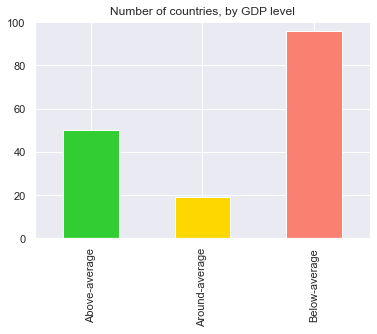

In [77]:
df[ColGdp.gdp_level].value_counts().sort_index().plot(
    kind='bar',
    title="Number of countries, by GDP level",
    color=ColorGdpLevel.values);

We want to find out how many people live in countries with below/around/above average GDP level.

In [78]:
df_pop_by_gdp_level = df.groupby(ColGdp.gdp_level)[[ColGdp.gdp_level, ColPop.population]].sum()
s_pop_bn_by_gdp_level = (df_pop_by_gdp_level / 1e9)[ColPop.population]
s_pop_bn_by_gdp_level

GDP level
Above-average     1.242958
Around-average    2.003163
Below-average     4.280620
Name: Population, dtype: float64

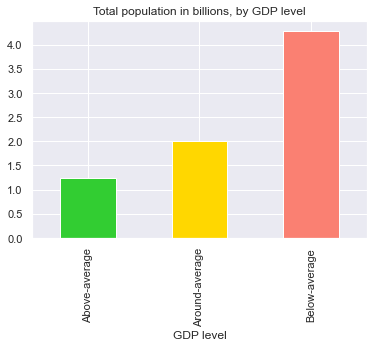

In [79]:
s_pop_bn_by_gdp_level.plot(
    kind='bar',
    title="Total population in billions, by GDP level",
    color=ColorGdpLevel.values);

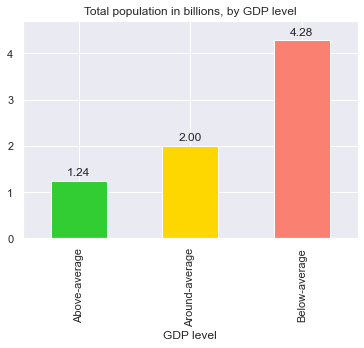

In [80]:
ax = s_pop_bn_by_gdp_level.plot(
    kind='bar',
    title="Total population in billions, by GDP level",
    color=ColorGdpLevel.values);
annotate_bars(ax, enumerate(s_pop_bn_by_gdp_level), ".2f")

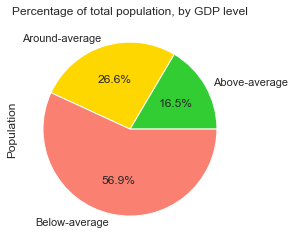

In [81]:
s_pop_bn_by_gdp_level.plot(
    kind='pie',
    autopct='%1.1f%%',
    title="Percentage of total population, by GDP level",
    colors=ColorGdpLevel.values)

Approx. 1/6 of total population lives in wealthy countries,
aprox. 1/4 in countries with GDP level around average,
and still more than 1/2 of total population lives in countries with GDP level below average,
both in terms of current USD and PPP dollars.

#### Analyze the correlation between democracy and GDP per capita

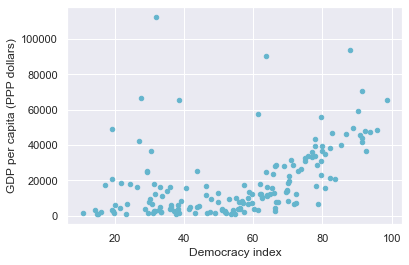

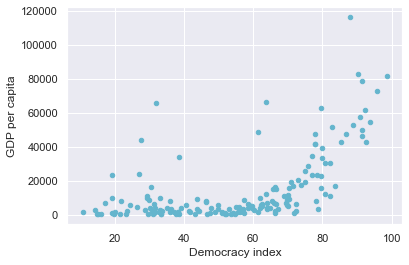

In [82]:
df.plot(kind='scatter', c='c', x=ColDem.democracy_index, y=ColGdp.gdp_per_capita_ppp);
df.plot(kind='scatter', c='c', x=ColDem.democracy_index, y=ColGdp.gdp_per_capita);

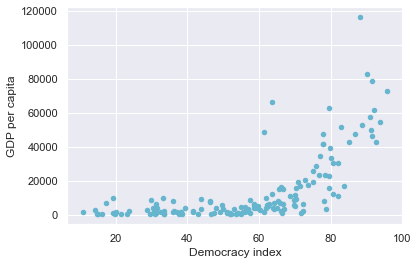

In [83]:
df[df[ColFuel.fuel_exports] <= 50]\
    .plot(kind='scatter', c='c', x=ColDem.democracy_index, y=ColGdp.gdp_per_capita);

Countries with above-average GDP per capita, but with non-democratic regime type:

In [84]:
df[(df[ColGdp.above_avg_gdp_per_capita]) & (df[ColDem.regime_type] != RegimeType.democracy)]\
    .sort_values(by=ColGdp.gdp_per_capita, ascending=False)

,Country,Year,GDP per capita (PPP dollars),GDP per capita,Population,Democracy index,Regime type,Fuel exports (% of merchandise exports),Above-average GDP per capita (PPP dollars),Above-average GDP per capita,GDP level
Country code,,,,,,,,,,,
qat,Qatar,2018,112532,65908.066901,2781677,31.9,Authoritarian,86.129643,True,True,Above-average
are,United Arab Emirates,2018,66616,43839.356349,9630959,27.6,Authoritarian,68.554755,True,True,Above-average
kwt,Kuwait,2018,65515,33994.381917,4137312,38.5,Authoritarian,90.895149,True,True,Above-average
bhr,Bahrain,2018,41973,23991.056677,1569439,27.1,Authoritarian,53.320392,True,True,Above-average
sau,Saudi Arabia,2018,48996,23338.963458,33699947,19.3,Authoritarian,81.016984,True,True,Above-average
omn,Oman,2018,36831,16521.182282,4829483,30.4,Authoritarian,75.185401,True,True,Above-average


In [85]:
df[(df[ColGdp.above_avg_gdp_per_capita_ppp]) & (df[ColDem.regime_type] != RegimeType.democracy)]\
    .sort_values(by=ColGdp.gdp_per_capita_ppp, ascending=False)

,Country,Year,GDP per capita (PPP dollars),GDP per capita,Population,Democracy index,Regime type,Fuel exports (% of merchandise exports),Above-average GDP per capita (PPP dollars),Above-average GDP per capita,GDP level
Country code,,,,,,,,,,,
qat,Qatar,2018,112532,65908.066901,2781677,31.9,Authoritarian,86.129643,True,True,Above-average
are,United Arab Emirates,2018,66616,43839.356349,9630959,27.6,Authoritarian,68.554755,True,True,Above-average
kwt,Kuwait,2018,65515,33994.381917,4137312,38.5,Authoritarian,90.895149,True,True,Above-average
sau,Saudi Arabia,2018,48996,23338.963458,33699947,19.3,Authoritarian,81.016984,True,True,Above-average
bhr,Bahrain,2018,41973,23991.056677,1569439,27.1,Authoritarian,53.320392,True,True,Above-average
omn,Oman,2018,36831,16521.182282,4829483,30.4,Authoritarian,75.185401,True,True,Above-average
rus,Russia,2018,25367,11370.813456,144477860,29.4,Authoritarian,52.680834,True,False,Around-average
tur,Turkey,2018,25287,9455.593654,82319724,43.7,Hybrid,2.464243,True,False,Around-average
kaz,Kazakhstan,2018,24738,9812.601405,18276498,29.4,Authoritarian,70.032848,True,False,Around-average


Countries with _less_ democratic regimes (democracy index between 60 and 70),
and GDP per capita above 20k.

In [86]:
df[(df[ColGdp.gdp_per_capita] > 20000) & (df[ColDem.democracy_index] >= 60) & (df[ColDem.democracy_index] <= 70)]

,Country,Year,GDP per capita (PPP dollars),GDP per capita,Population,Democracy index,Regime type,Fuel exports (% of merchandise exports),Above-average GDP per capita (PPP dollars),Above-average GDP per capita,GDP level
Country code,,,,,,,,,,,
hkg,"Hong Kong, China",2018,57322,48543.400991,7451000,61.5,Democracy,0.119866,True,True,Above-average
sgp,Singapore,2018,90091,66188.779396,5638676,63.8,Democracy,13.120045,True,True,Above-average


Let's group by both the GDP level and regime type

In [87]:
df.groupby([ColGdp.gdp_level, ColDem.regime_type])[ColGdp.country].count()

GDP level       Regime type  
Above-average   Authoritarian     6
                Hybrid            0
                Democracy        44
Around-average  Authoritarian     9
                Hybrid            3
                Democracy         7
Below-average   Authoritarian    37
                Hybrid           36
                Democracy        23
Name: Country, dtype: int64

In [88]:
df.groupby([ColGdp.gdp_level, ColDem.regime_type])[ColPop.population].sum() / df[ColPop.population].sum() * 100

GDP level       Regime type  
Above-average   Authoritarian     0.752634
                Hybrid                 NaN
                Democracy        15.761256
Around-average  Authoritarian    22.194818
                Hybrid            2.024389
                Democracy         2.394740
Below-average   Authoritarian    12.728189
                Hybrid           14.758202
                Democracy        29.385772
Name: Population, dtype: float64

In [89]:
df1 = df[[ColGdp.gdp_level, ColDem.regime_type, ColGdp.gdp_per_capita, ColPop.population]].copy()
df1["GDP total"] = df1[ColGdp.gdp_per_capita] * df1[ColPop.population]
df1["GDP percentage"] = df1["GDP total"] / gdp_total * 100
df1.head(20)

,GDP level,Regime type,GDP per capita,Population,GDP total,GDP percentage
Country code,,,,,,
afg,Below-average,Authoritarian,493.750418,37172386,1.835388e+10,0.021553
alb,Below-average,Hybrid,5284.380184,2866376,1.514702e+10,0.017787
dza,Below-average,Authoritarian,4153.733978,42228429,1.754057e+11,0.205976
ago,Below-average,Authoritarian,3289.646664,30809762,1.013532e+11,0.119017
arg,Above-average,Democracy,11633.498009,44494502,5.176267e+11,0.607841
arm,Below-average,Hybrid,4220.490277,2951776,1.245794e+10,0.014629
aus,Above-average,Democracy,57354.964046,24982688,1.432881e+12,1.682609
aut,Above-average,Democracy,51478.285262,8840521,4.550949e+11,0.534411
aze,Around-average,Authoritarian,4739.841710,9939771,4.711294e+10,0.055324


In [90]:
df1.groupby([ColGdp.gdp_level, ColDem.regime_type]).sum()

GDP per capita    Population     GDP total  \
GDP level      Regime type                                                 
Above-average  Authoritarian    2.075930e+05  5.664882e+07  1.650158e+12   
               Hybrid                    NaN           NaN           NaN   
               Democracy        1.756268e+06  1.186309e+09  5.262012e+13   
Around-average Authoritarian    7.276802e+04  1.670546e+09  1.638478e+13   
               Hybrid           2.559713e+04  1.523705e+08  1.290400e+12   
               Democracy        6.934418e+04  1.802459e+08  1.791334e+12   
Below-average  Authoritarian    7.710377e+04  9.580178e+08  1.692534e+12   
               Hybrid           1.006807e+05  1.110812e+09  2.192002e+12   
               Democracy        1.055412e+05  2.211791e+09  7.442865e+12   

                              GDP percentage  
GDP level      Regime type                    
Above-average  Authoritarian        1.937755  
               Hybrid                    NaN  
               Democracy           61.790955  
Around-average Authoritarian       19.240380  
               Hybrid               1.515296  
               Democracy            2.103534  
Below-average  Authoritarian        1.987516  
               Hybrid               2.574032  
               Democracy            8.740036

TODO: or just show the percentage of Total GDP produces in each regime type.

In [91]:
df1.loc[['chn', 'usa', 'ind', 'rus']]

,GDP level,Regime type,GDP per capita,Population,GDP total,GDP percentage
Country code,,,,,,
chn,Around-average,Authoritarian,9976.677137,1392730000,1.389482e+13,16.316461
usa,Above-average,Democracy,62996.471285,326687501,2.058016e+13,24.166951
ind,Below-average,Democracy,2005.863005,1352617328,2.713165e+12,3.186026
rus,Around-average,Authoritarian,11370.813456,144477860,1.642831e+12,1.929150


#### Analyze the fuel exporting countries

The countries where fuel exports amount to more than half of merchandise exports

In [92]:
df_fuel_more_than_half = df[df[ColFuel.fuel_exports] > 50].sort_values(by=ColFuel.fuel_exports, ascending=False)
print(f"There are {len(df_fuel_more_than_half)} countries where fuel exports amount to more than half of merchandise exports.")
df_fuel_more_than_half

There are 18 countries where fuel exports amount to more than half of merchandise exports.


,Country,Year,GDP per capita (PPP dollars),GDP per capita,Population,Democracy index,Regime type,Fuel exports (% of merchandise exports),Above-average GDP per capita (PPP dollars),Above-average GDP per capita,GDP level
Country code,,,,,,,,,,,
irq,Iraq,2018,15565,5834.166211,38433600,40.6,Hybrid,99.986485,False,False,Below-average
dza,Algeria,2018,13886,4153.733978,42228429,35.0,Authoritarian,96.111562,False,False,Below-average
lby,Libya,2018,18406,7877.122251,6678567,21.9,Authoritarian,95.396749,True,False,Around-average
nga,Nigeria,2018,5316,2027.777979,195874740,44.4,Hybrid,94.113782,False,False,Below-average
ago,Angola,2018,5725,3289.646664,30809762,36.2,Authoritarian,92.417810,False,False,Below-average
aze,Azerbaijan,2018,16011,4739.841710,9939771,26.5,Authoritarian,91.736389,True,False,Around-average
kwt,Kuwait,2018,65515,33994.381917,4137312,38.5,Authoritarian,90.895149,True,True,Above-average
qat,Qatar,2018,112532,65908.066901,2781677,31.9,Authoritarian,86.129643,True,True,Above-average
cog,"Congo, Rep.",2018,5024,2577.701705,5244363,33.1,Authoritarian,82.217412,False,False,Below-average


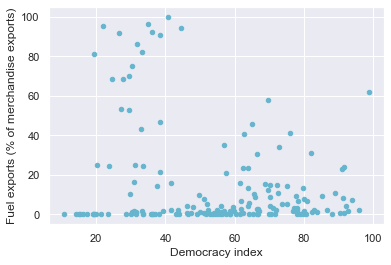

In [93]:
df.plot(kind='scatter', c='c', x=ColDem.democracy_index, y=ColFuel.fuel_exports);

In [94]:
corrcoef(df[ColFuel.fuel_exports], df[ColDem.democracy_index])

-0.23816776557027117

There is only a weak negative correlation between fuel exports percentage and the democracy index.

In [95]:
df[[ColGdp.gdp_level, ColDem.regime_type, ColFuel.fuel_exports]]

,GDP level,Regime type,Fuel exports (% of merchandise exports)
Country code,,,
afg,Below-average,Authoritarian,10.213180
alb,Below-average,Hybrid,1.662666
dza,Below-average,Authoritarian,96.111562
ago,Below-average,Authoritarian,92.417810
arg,Above-average,Democracy,4.119375
...,...,...,...
vnm,Below-average,Authoritarian,1.613913
pse,Below-average,Hybrid,0.071807
yem,Below-average,Authoritarian,0.000000


In [96]:
df[(df[ColGdp.gdp_level] == GdpLevel.above_average) & (df[ColDem.regime_type] == RegimeType.democracy)]

,Country,Year,GDP per capita (PPP dollars),GDP per capita,Population,Democracy index,Regime type,Fuel exports (% of merchandise exports),Above-average GDP per capita (PPP dollars),Above-average GDP per capita,GDP level
Country code,,,,,,,,,,,
arg,Argentina,2018,18282,11633.498009,44494502,70.2,Democracy,4.119375,True,True,Above-average
aus,Australia,2018,45439,57354.964046,24982688,90.9,Democracy,23.069720,True,True,Above-average
aut,Austria,2018,46473,51478.285262,8840521,82.9,Democracy,2.094995,True,True,Above-average
bel,Belgium,2018,43218,47583.074941,11427054,77.8,Democracy,9.442898,True,True,Above-average
can,Canada,2018,44051,46313.171371,37057765,91.5,Democracy,24.005792,True,True,Above-average
chl,Chile,2018,22874,15924.794239,18729160,79.7,Democracy,0.881231,True,True,Above-average
hrv,Croatia,2018,23637,15014.085019,4087843,65.7,Democracy,10.564975,True,True,Above-average
cyp,Cyprus,2018,33954,28689.706723,1189265,75.9,Democracy,41.054932,True,True,Above-average
cze,Czech Republic,2018,33414,23415.843627,10629928,76.9,Democracy,1.933494,True,True,Above-average


In [97]:
corrcoef(df[ColGdp.gdp_per_capita], df[ColDem.democracy_index])
# corrcoef(df[ColGdp.gdp_per_capita_ppp], df[ColDem.democracy_index])

0.5812592848545128

There is an notable correlation between GDP per capita and the democracy index.

In [98]:
df1 = df[df[ColFuel.fuel_exports] <= 50]
corrcoef(df1[ColGdp.gdp_per_capita], df1[ColDem.democracy_index])

0.6563941063346832

The correlation is even higher if we filter out countries where fuel exports constitute
more than half of merchandise exports.